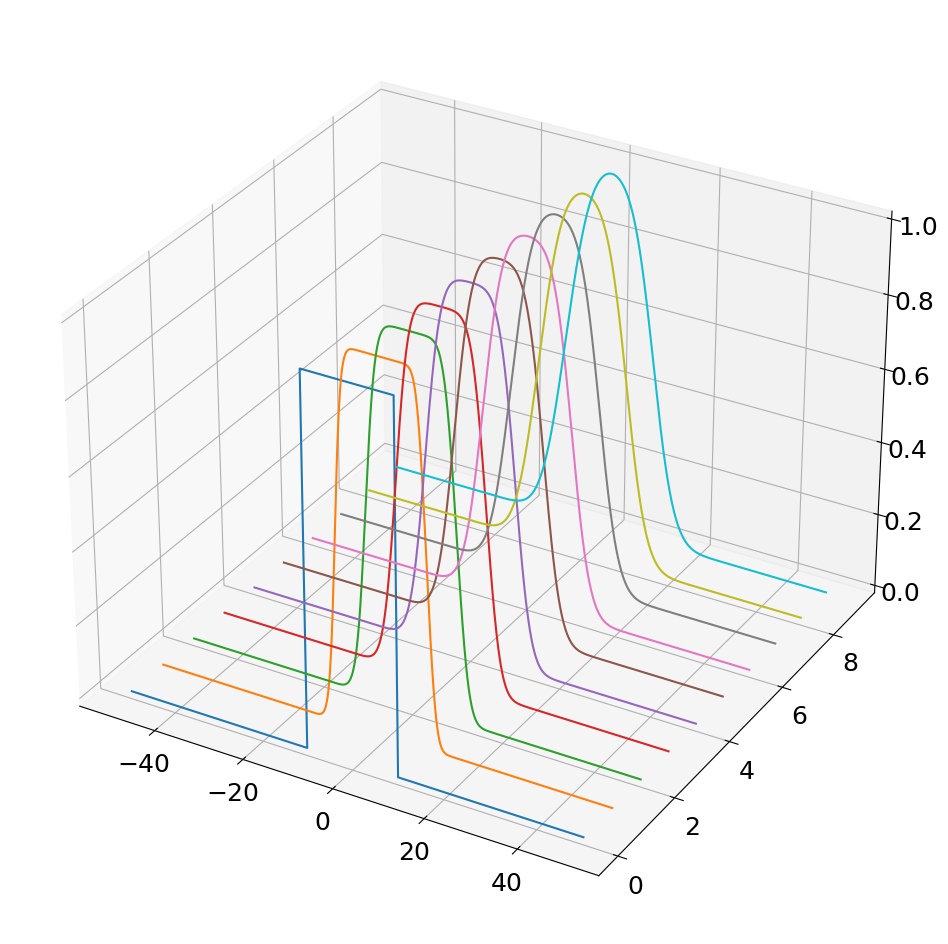

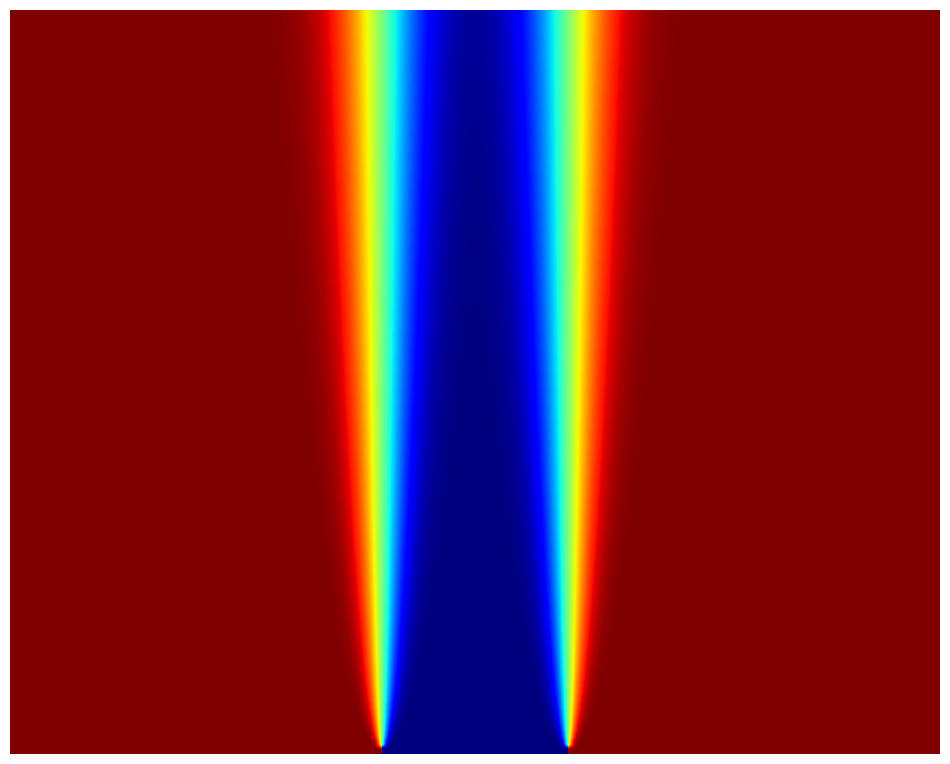

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import axes3d
import matplotlib.cm as cm
plt.rcParams['figure.figsize']= [12,12]
plt.rcParams.update({'font.size': 18})

# Heat equation
a = 1
n = 1000
L = 100
dx = L/n
x = np.arange(-L/2, L/2, dx)

# It does the reordering of the w values (fftshift) automatically
w = 2*np.pi*np.fft.fftfreq(n,d=dx)

# Setting up initial conditions and doing fft on it
u0 = np.zeros_like(x)
u0[int((L/2 - L/10)/dx):int((L/2 + L/10)/dx)] = 1
u0_h = np.fft.fft(u0)

u0_h_real = np.concatenate((u0_h.real, u0_h.imag))
dt = 0.1
t = np.arange(0,10,dt)

def heat(u_h_real,t,w,a):
    u_h = u_h_real[:n] + (1j) * u_h_real[n:]
    du_h = -a**2 * (np.power(w,2)) * u_h
    du_h_real = np.concatenate((du_h.real, du_h.imag)).astype('float64')
    return du_h_real

u_h_real = odeint(heat,u0_h_real, t, args=(w,a))
u_h = u_h_real[:,:n] + (1j) * u_h_real[:,n:]

u = np.zeros_like(u_h)

for k in range(len(t)):
    u[k,:] = np.fft.ifft(u_h[k,:])

u = u.real

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.set_cmap('jet_r')
u_p = u[0:-1:10,:]
for j in range(u_p.shape[0]):
  y = j*np.ones(u_p.shape[1])
  ax.plot(x,y,u_p[j,:])

plt.figure()
plt.imshow(np.flipud(u), aspect=8)
plt.axis('off')
plt.xlabel("space")
plt.xlabel("time")
plt.show()

